# WeatherPy
----

### Analysis
* It is clear that temperature increases as distance from the equator decreases, as one would expect. It also appears that as you move away from the equator, the northern hemisphere (positive latitude) is colder than the southern hemisphere (negative latitude). This is most likely due to the fact that the northern hemisphere is currently transitioning out of winter while the southern hemisphere is currently transitioning out of summer.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, just below 80, and just below 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there are a few cities with over 25 mph of wind.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
csv_output = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Setup
cd = {'City':cities}
city_df = pd.DataFrame(cd)

city_df['Latitude'] = ''
city_df['Temperature (F)'] = ''
city_df['Wind Speed (mph)'] = ''
city_df['Cloudiness (%)'] = ''
city_df['Humidity (%)'] = ''

url = "http://api.openweathermap.org/data/2.5/weather?"

In [12]:
#Data Retrieval

tot_ctr = 0
set_ctr = 1
rec_ctr = 1
city_nf = []


print('Beginning Data Retrieval ')    
print('-----------------------------')

for i, r in city_df.iterrows():
    city = r['City']
    query_url = url + 'APPID='+ api_key +'&q=' + city +'&units=' + 'imperial'
    weather_response = requests.get(query_url)
    w_info = weather_response.json()
    
    if w_info['cod'] == '404':
        print('City not found. Skipping ...')
        city_nf.append(i)
        
    elif rec_ctr <= 50:
        
        #print(f'Processing Record {rec_ctr} of Set {set_ctr} | {w_info['name']}')
        print(f'Processing Record {rec_ctr} of Set {set_ctr} | {city}')
        city_df.loc[i,'City'] = w_info['name']
        city_df.loc[i, 'Latitude'] = w_info['coord']['lat']
        city_df.loc[i,'Humidity (%)'] = w_info['main']['humidity']
        city_df.loc[i,'Temperature (F)'] = w_info['main']['temp']
        city_df.loc[i,'Cloudiness (%)'] = w_info['clouds']['all']
        city_df.loc[i,'Wind Speed (mph)'] = w_info['wind']['speed']
        
        rec_ctr += 1
        tot_ctr +=1
        
    else:
        rec_ctr = 1
        set_ctr += 1
        
        #print(f'Processing Record {rec_ctr} of Set {set_ctr} | {w_info['name']}')
        print(f'Processing Record {rec_ctr} of Set {set_ctr} | {city}')
        
        city_df.loc[i,'City'] = w_info['name']
        city_df.loc[i, 'Latitude'] = w_info['coord']['lat']
        city_df.loc[i,'Humidity (%)'] = w_info['main']['humidity']
        city_df.loc[i,'Temperature (F)'] = w_info['main']['temp']
        city_df.loc[i,'Cloudiness (%)'] = w_info['clouds']['all']
        city_df.loc[i,'Wind Speed (mph)'] = w_info['wind']['speed']
        tot_ctr += 1

for x in city_nf:
    city_df = city_df.drop(index = x)


print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | Kapaa
Processing Record 2 of Set 1 | Flinders
Processing Record 3 of Set 1 | Upernavik
Processing Record 4 of Set 1 | Jamestown
Processing Record 5 of Set 1 | Carnarvon
Processing Record 6 of Set 1 | Saint-Philippe
Processing Record 7 of Set 1 | Port Elizabeth
Processing Record 8 of Set 1 | Chuy
Processing Record 9 of Set 1 | Concordia
Processing Record 10 of Set 1 | Rikitea
Processing Record 11 of Set 1 | Albany
Processing Record 12 of Set 1 | La Paz
Processing Record 13 of Set 1 | Kruisfontein
Processing Record 14 of Set 1 | Geraldton
Processing Record 15 of Set 1 | Mataura
Processing Record 16 of Set 1 | Baoding
Processing Record 17 of Set 1 | Nara
Processing Record 18 of Set 1 | Adre
Processing Record 19 of Set 1 | Avarua
Processing Record 20 of Set 1 | Lae
Processing Record 21 of Set 1 | Bredasdorp
Processing Record 22 of Set 1 | Bathsheba
Processing Record 23 of Set 1 | Okha
Processing Record 2

Processing Record 47 of Set 4 | Luderitz
Processing Record 48 of Set 4 | Tevriz
Processing Record 49 of Set 4 | Liverpool
Processing Record 50 of Set 4 | Luanda
Processing Record 1 of Set 5 | Vardo
Processing Record 1 of Set 5 | Kumluca
Processing Record 2 of Set 5 | Belaya Gora
Processing Record 3 of Set 5 | Bowen
Processing Record 4 of Set 5 | Champerico
Processing Record 5 of Set 5 | Yarmouth
Processing Record 6 of Set 5 | Coolum Beach
Processing Record 7 of Set 5 | Nioaque
Processing Record 8 of Set 5 | Faya
Processing Record 9 of Set 5 | Lebowakgomo
Processing Record 10 of Set 5 | Dunedin
Processing Record 11 of Set 5 | Svetlogorsk
Processing Record 12 of Set 5 | Umba
Processing Record 13 of Set 5 | Cherskiy
Processing Record 14 of Set 5 | Maniitsoq
Processing Record 15 of Set 5 | Hasaki
Processing Record 16 of Set 5 | Saint Anthony
Processing Record 17 of Set 5 | Cidreira
Processing Record 18 of Set 5 | Chapada dos Guimaraes
Processing Record 19 of Set 5 | Airai
Processing Record

Processing Record 42 of Set 8 | Shafranovo
Processing Record 43 of Set 8 | Huaicheng
Processing Record 44 of Set 8 | Rosario
Processing Record 45 of Set 8 | Lazaro Cardenas
Processing Record 46 of Set 8 | Muramvya
Processing Record 47 of Set 8 | Tessalit
Processing Record 48 of Set 8 | Puro
Processing Record 49 of Set 8 | Berlevag
Processing Record 50 of Set 8 | Yashan
Processing Record 1 of Set 9 | Borogontsy
Processing Record 1 of Set 9 | Beringovskiy
Processing Record 2 of Set 9 | Minab
Processing Record 3 of Set 9 | Lindas
Processing Record 4 of Set 9 | George
Processing Record 5 of Set 9 | Moerai
Processing Record 6 of Set 9 | West Wendover
Processing Record 7 of Set 9 | Lianzhou
Processing Record 8 of Set 9 | Anadyr
Processing Record 9 of Set 9 | Emerald
Processing Record 10 of Set 9 | San Joaquin
Processing Record 11 of Set 9 | Fortuna
Processing Record 12 of Set 9 | North Bend
Processing Record 13 of Set 9 | Muli
Processing Record 14 of Set 9 | Coahuayana
Processing Record 15 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df.to_csv(csv_output)

In [6]:
city_df.head()

,City,Latitude,Temperature (F),Wind Speed (mph),Cloudiness (%),Humidity (%)
0,Kapaa,22.08,75.36,10.29,1,53
2,Flinders,-34.58,58.77,17.22,0,50
3,Upernavik,72.79,11.17,9.19,20,89
4,Jamestown,-33.21,58.87,9.42,68,91
5,Carnarvon,-30.97,58.51,3.83,80,29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
#date info
d = date.today()

mm = d.month
dd = d.day
yy = d.year - 2000


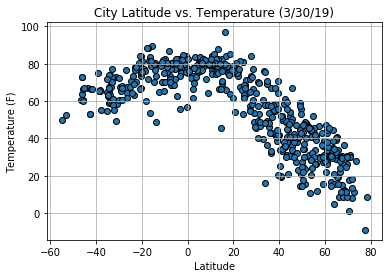

In [8]:
plt.scatter(city_df['Latitude'], city_df['Temperature (F)'], edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'City Latitude vs. Temperature ({mm}/{dd}/{yy})')

plt.savefig("Latitude vs. Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

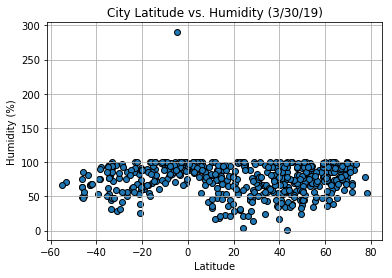

In [9]:
plt.scatter(city_df['Latitude'], city_df['Humidity (%)'], edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({mm}/{dd}/{yy})')

plt.savefig("Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

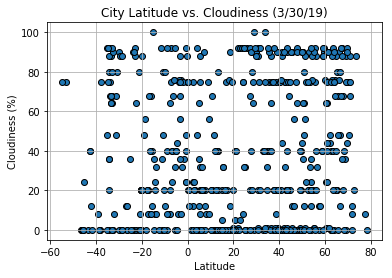

In [10]:
plt.scatter(city_df['Latitude'], city_df['Cloudiness (%)'], edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({mm}/{dd}/{yy})')

plt.savefig("Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

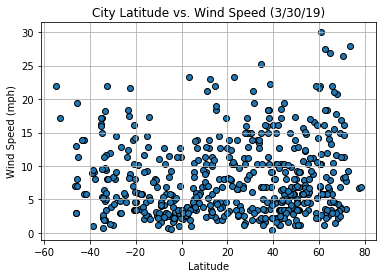

In [11]:
plt.scatter(city_df['Latitude'], city_df['Wind Speed (mph)'], edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({mm}/{dd}/{yy})')

plt.savefig("Latitude vs. Wind Speed.png")
plt.show()